In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import subprocess as sp
from pathlib import Path
import os

## Loading and constructing Datasets

In [9]:
data_dir = sp.getoutput('./data-dir.sh')
data_dir

'../datasets'

In [12]:
paths = Path(data_dir).rglob('*.jp*')
df = pd.DataFrame({ 'filepath': paths })
to_abs = lambda path: os.path.abspath(path)
df['filepath'] = df['filepath'].map(to_abs)
df

,filepath
0,/Users/dunnkers/git/deep-learning/datasets/Ges...
1,/Users/dunnkers/git/deep-learning/datasets/Ges...
2,/Users/dunnkers/git/deep-learning/datasets/Ges...
3,/Users/dunnkers/git/deep-learning/datasets/Ges...
4,/Users/dunnkers/git/deep-learning/datasets/Ges...
...,...
226382,/Users/dunnkers/git/deep-learning/datasets/asl...
226383,/Users/dunnkers/git/deep-learning/datasets/asl...
226384,/Users/dunnkers/git/deep-learning/datasets/asl...
226385,/Users/dunnkers/git/deep-learning/datasets/asl...


In [13]:
df.to_csv(f'{data_dir}/index.csv', index=False)

In [14]:
df = pd.read_csv(f'{data_dir}/index.csv')
to_exclude = df['filepath'].str.contains('asl_alphabet_test') | \
             df['filepath'].str.contains('Pre-Processed')
df = df[~to_exclude].reset_index(drop=True)
df

,filepath
0,/Users/dunnkers/git/deep-learning/datasets/Ges...
1,/Users/dunnkers/git/deep-learning/datasets/Ges...
2,/Users/dunnkers/git/deep-learning/datasets/Ges...
3,/Users/dunnkers/git/deep-learning/datasets/Ges...
4,/Users/dunnkers/git/deep-learning/datasets/Ges...
...,...
170854,/Users/dunnkers/git/deep-learning/datasets/asl...
170855,/Users/dunnkers/git/deep-learning/datasets/asl...
170856,/Users/dunnkers/git/deep-learning/datasets/asl...
170857,/Users/dunnkers/git/deep-learning/datasets/asl...


Extract class and image index from filename.

In [15]:
df['filename'] = df['filepath'].map(os.path.basename)
df['filename']

0            63.jpg
1           823.jpg
2          1409.jpg
3           189.jpg
4            77.jpg
            ...    
170854    W2943.jpg
170855     W407.jpg
170856    W1292.jpg
170857     W361.jpg
170858     W349.jpg
Name: filename, Length: 170859, dtype: object

In [16]:
df['class'] = df['filepath'].str.split('/').str[-2]
df['class']

0         R
1         R
2         R
3         R
4         R
         ..
170854    W
170855    W
170856    W
170857    W
170858    W
Name: class, Length: 170859, dtype: object

In [17]:
df = df[df['class'].str.match(r'^[a-zA-Z]$')] # keep alphabet only
df['class'] = df['class'].str.upper()
df

,filepath,filename,class
0,/Users/dunnkers/git/deep-learning/datasets/Ges...,63.jpg,R
1,/Users/dunnkers/git/deep-learning/datasets/Ges...,823.jpg,R
2,/Users/dunnkers/git/deep-learning/datasets/Ges...,1409.jpg,R
3,/Users/dunnkers/git/deep-learning/datasets/Ges...,189.jpg,R
4,/Users/dunnkers/git/deep-learning/datasets/Ges...,77.jpg,R
...,...,...,...
170854,/Users/dunnkers/git/deep-learning/datasets/asl...,W2943.jpg,W
170855,/Users/dunnkers/git/deep-learning/datasets/asl...,W407.jpg,W
170856,/Users/dunnkers/git/deep-learning/datasets/asl...,W1292.jpg,W
170857,/Users/dunnkers/git/deep-learning/datasets/asl...,W361.jpg,W


In [18]:
df['class'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

Save dataset to `.csv`

In [19]:
df.to_csv(f'{data_dir}/data.csv', index=False)

Find distribution of classes

<AxesSubplot:xlabel='class', ylabel='Count'>

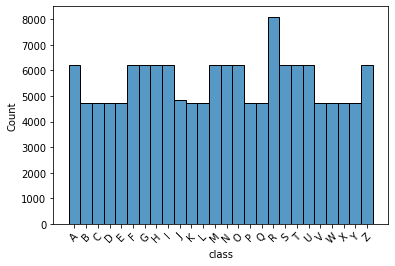

In [20]:
plt.xticks(rotation=45)
sns.histplot(data=df.sort_values('class'), x='class')

Display some example images.

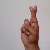

In [21]:
from IPython.display import Image
Image(filename=df['filepath'].values[0])

In [22]:
samples = df.sample(100)

In [23]:
len(samples)

100

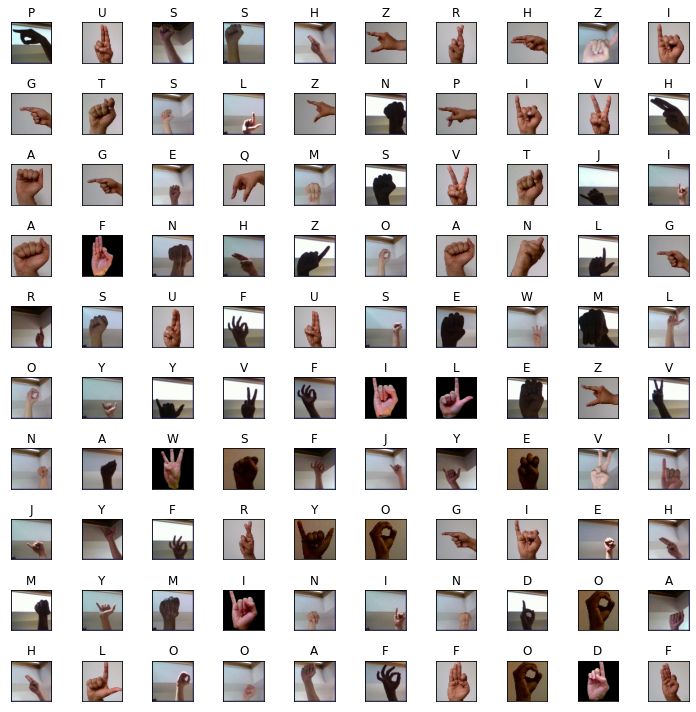

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
f, ax = plt.subplots(10, 10, figsize=(10,10))
for i in range(len(samples)):
    classnm = samples['class'].values[i]
    path = samples['filepath'].values[i]
    plt.subplot(10, 10, i + 1, title=classnm)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = Image.open(path)
    plt.imshow(im)
plt.tight_layout()
plt.show()